In [1]:
from Precode import *
import numpy
import random
# import seaborn as sns
# from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
data = np.load('AllSamples.npy')

In [2]:
k1,i_point1 = initial_S1('5263',3) # please replace 0111 with your last four digit of your ID
k2,i_point2 = initial_S1('5263',5)

In [3]:
print(k1)
print(i_point1)
print(k2)
print(i_point2)

3
[[6.92525072 2.26330209]
 [8.33664582 9.23795257]
 [2.05924902 7.20598798]]
5
[[3.81485895 6.91844078]
 [2.81629029 3.1999725 ]
 [2.20011496 1.53863221]
 [5.2979492  3.65258141]
 [8.60402994 8.76147163]]


In [4]:
for i in range(2,11):
    print(i)
    print(initial_S1('5263',i)[1])

2
[[8.09469345 7.79199846]
 [6.60277235 6.31081582]]
3
[[6.92525072 2.26330209]
 [8.33664582 9.23795257]
 [2.05924902 7.20598798]]
4
[[5.14167285 5.71626939]
 [2.36057145 6.00796623]
 [8.09209017 3.39065059]
 [4.96433498 7.88753239]]
5
[[3.81485895 6.91844078]
 [2.81629029 3.1999725 ]
 [2.20011496 1.53863221]
 [5.2979492  3.65258141]
 [8.60402994 8.76147163]]
6
[[ 6.09952696  9.0178614 ]
 [ 8.21925014  9.11712554]
 [ 6.2396717   6.55049457]
 [ 6.47011829  5.54035543]
 [ 2.18568667  3.11739024]
 [ 3.04101702 -0.36138487]]
7
[[5.32508246 7.68399917]
 [4.32239695 0.33088885]
 [3.02105687 9.26213796]
 [4.50496872 4.7214697 ]
 [5.77144223 9.04075394]
 [8.21026885 8.18439548]
 [1.81229618 3.40781697]]
8
[[5.36626615 6.51434231]
 [3.0226944  0.86402039]
 [8.07641652 9.27162002]
 [4.4280969  7.41377907]
 [7.57805025 3.82487017]
 [6.48423011 5.04416608]
 [6.90743481 6.00718092]
 [5.33498937 3.07430754]]
9
[[7.39015357 1.13206806]
 [7.68097556 0.83542043]
 [2.81629029 3.1999725 ]
 [8.09469345 7.

In [5]:
def intialize_centroids(k):
    centroids = (initial_S1('5263',k)[1])
#     centroids=[]
#     for i in range(k):
#         centroids.append(data[random.randint(0, len(data)-1)])
        
    
    return centroids

In [6]:
print(intialize_centroids(10))

[[7.45225989 2.26860809]
 [7.39015357 1.13206806]
 [1.89785053 3.50014156]
 [2.64145141 2.62206822]
 [2.48989693 8.40047863]
 [6.8950152  0.95350302]
 [2.77605992 2.74592055]
 [2.11728317 6.61574036]
 [3.03696341 5.82211317]
 [2.65875751 1.7541119 ]]


In [7]:
def run_kmeans(k, centroids=None):
    
    cost_func=[]
    
    if np.all(centroids) == None:
        centroids=intialize_centroids(k)
    
    while True:
        sum_sq_err=0
        data_clusters=[]
        for val in data:
#             data_clusters.append(((np.linalg.norm((val - centroids), axis=0) ** 2)))
#         cost_func = np.sum(data_clusters)

            distances=[]
            for center in centroids:
            
                distances.append(np.linalg.norm(val-center)**2)
                
#                 distances.append(np.linalg.norm(val-center))
            sum_sq_err+=distances[np.argmin(distances)]
            data_clusters.append(str(np.argmin(distances)))
#             print(distances)
#             print(data_clusters)

        cost_func.append(sum_sq_err)        
        
        new_centroids=[]
        for i in range(len(centroids)):
            cluster_indices=[]
            for j in range(len(data_clusters)):
                if data_clusters[j]==str(i):
                    cluster_indices.append(j)
#                     print(cluster_indices)

            new_centroid=0
            for index in cluster_indices:
                new_centroid+=data[index]
                
            if len(cluster_indices)!=0:
                new_centroid/=len(cluster_indices)
            else:
                new_centroid=np.array([0, 0])
                
            new_centroids.append(new_centroid)
        
        if np.array_equal(new_centroids, centroids):
            break
        else:
            centroids=new_centroids
    
    rounded_centroids=[]
    for val in centroids:
        edited_centroids=['%.8f' % elem for elem in val]
        edited_centroids=[float(elem) for elem in edited_centroids]
        rounded_centroids.append(edited_centroids)
#     return [rounded_centroids, float('%.10f' % cost_func)]
    return [rounded_centroids, float('%.10f' % cost_func[-1])]

In [8]:
print(run_kmeans(3, centroids=None))


[[[5.47740039, 2.25498103], [6.49724962, 7.52297293], [2.56146449, 6.08861338]], 1293.7774523911]


<b>State 1 results</b>

In [9]:
centroids, obj_func = run_kmeans(k1, i_point1)
print('Centroids: '+ str(centroids))
print('Loss: '+ str(obj_func))

Centroids: [[5.47740039, 2.25498103], [6.49724962, 7.52297293], [2.56146449, 6.08861338]]
Loss: 1293.7774523911


<b>State 2 results</b>

In [10]:
centroids, obj_func = run_kmeans(k2, i_point2)
print('Centroids: '+ str(centroids))
print('Loss: '+ str(obj_func))

Centroids: [[3.006688, 7.03481503], [3.5545081, 3.62813062], [3.14506148, 0.90770655], [7.41419243, 2.32169114], [6.80421029, 7.6562222]]
Loss: 653.9567908404


<b>Randomly initialized centroids and multiple Ks round 1</b>

In [11]:
# final_centroids=[]
cost_funcs=[]
for k in range(2, 11):
#     print(k)
#     print(centroids)
    centroids, obj_func = run_kmeans(k)
    print(k)
    print(centroids, obj_func)
#     final_centroids.append(centroids)
    cost_funcs.append(float(obj_func))

2
[[4.85261193, 7.27164171], [5.00056234, 2.48542748]] 1921.0334858562
3
[[5.47740039, 2.25498103], [6.49724962, 7.52297293], [2.56146449, 6.08861338]] 1293.7774523911
4
[[3.36373274, 2.59646706], [2.8337661, 6.9189569], [7.41419243, 2.32169114], [6.57957643, 7.57333595]] 788.2734352397
5
[[3.006688, 7.03481503], [3.5545081, 3.62813062], [3.14506148, 0.90770655], [7.41419243, 2.32169114], [6.80421029, 7.6562222]] 653.9567908404
6
[[2.52382885, 7.02897469], [7.75648325, 8.55668928], [5.46427736, 6.83771354], [7.41419243, 2.32169114], [3.502455, 3.62870476], [3.14506148, 0.90770655]] 476.296570527
7
[[6.15468228, 5.70140721], [7.55616782, 2.23516796], [2.56333815, 6.9782248], [4.81833058, 3.6950232], [5.0217766, 7.82401258], [7.91430998, 8.51990981], [2.68198633, 2.09461587]] 390.9175762542
8
[[3.00060229, 5.78295786], [2.73625005, 1.97510103], [7.91430998, 8.51990981], [2.18321462, 7.70355341], [7.55616782, 2.23516796], [6.15468228, 5.70140721], [5.0217766, 7.82401258], [4.91251497, 3.5

In [12]:
# for i in range(len(final_centroids)):
#     print('Number of Clusters: ' + str(i+2))
#     print('Centroids: '+ str(centroids[i]))
#     print('Centroids: '+ str(centroids))
#     print('Loss: '+ str(cost_funcs[i]))
#     print('-')

In [13]:
# sns.lineplot(list(range(2, 11)), cost_funcs)

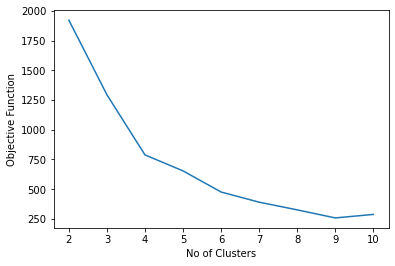

In [14]:
plt.plot(list(range(2, 11)),cost_funcs)
plt.xlabel('No of Clusters') 
plt.ylabel('Objective Function') 
plt.show()

<b>Randomly initialized centroids and multiple Ks round 2</b>

In [15]:
final_centroids=[]
cost_funcs=[]
for k in range(2, 11):
    print(k)
    centroids, obj_func = run_kmeans(k)
    final_centroids.append(centroids)
    cost_funcs.append(float(obj_func))

2
3
4
5
6
7
8
9
10


In [16]:
for i in range(len(final_centroids)):
    print('Number of Clusters: ' + str(i+2))
#     print('Centroids: '+ str(centroids[i]))
    print('Loss: '+ str(cost_funcs[i]))
    print('-')

Number of Clusters: 2
Loss: 1921.0334858562
-
Number of Clusters: 3
Loss: 1293.7774523911
-
Number of Clusters: 4
Loss: 788.2734352397
-
Number of Clusters: 5
Loss: 653.9567908404
-
Number of Clusters: 6
Loss: 476.296570527
-
Number of Clusters: 7
Loss: 390.9175762542
-
Number of Clusters: 8
Loss: 326.26502937
-
Number of Clusters: 9
Loss: 258.498075285
-
Number of Clusters: 10
Loss: 287.8433257487
-


In [17]:
sns.lineplot(list(range(2, 11)), cost_funcs)

NameError: name 'sns' is not defined